In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
from IPython.display import Image


#Projet Deep Hedging

Deep hedging est une approche innovante en finance qui utilise des réseaux de neurones pour gérer les risques financiers de manière plus efficace. Il s'agit d'optimiser les décisions de couverture en utilisant des modèles d'apprentissage automatique profond pour minimiser les pertes potentielles. En combinant la puissance des réseaux de neurones avec les stratégies de couverture traditionnelles, le deep hedging permet d'améliorer la gestion des portefeuilles et de réduire les risques.

Notre objectif est de trouver la meilleure stratégie à l'instant t pour un stock qui suit le modèle de `Black-Scholes` en utilisant un réseau de neurones qui optimise la fonction de perte suivante :

$L=\frac{1}{m} \sum_{l=1}^{m}(\sum_{k=0}^{n-1}\Delta^{(l)}_{t_k}(S^{(l)}_{t_{k+1}}-S^{(l)}_{t_k})+P^{(l)}-(S^{(l)}_{T}-K)_{t})^2$

$(l)$: Indice des données

m: Nombre des données

n: Nombre de de time stepe

T: Date maturité

K: Prix d'exercice

$\Delta^{(l)}_{t_k}$: La stategie à l'instant ${t_k}$

$S^{(l)}_{t_k}$:Stocks à l'instant ${t_k}$


##NEURAL NETWORK ARCHITECTURE

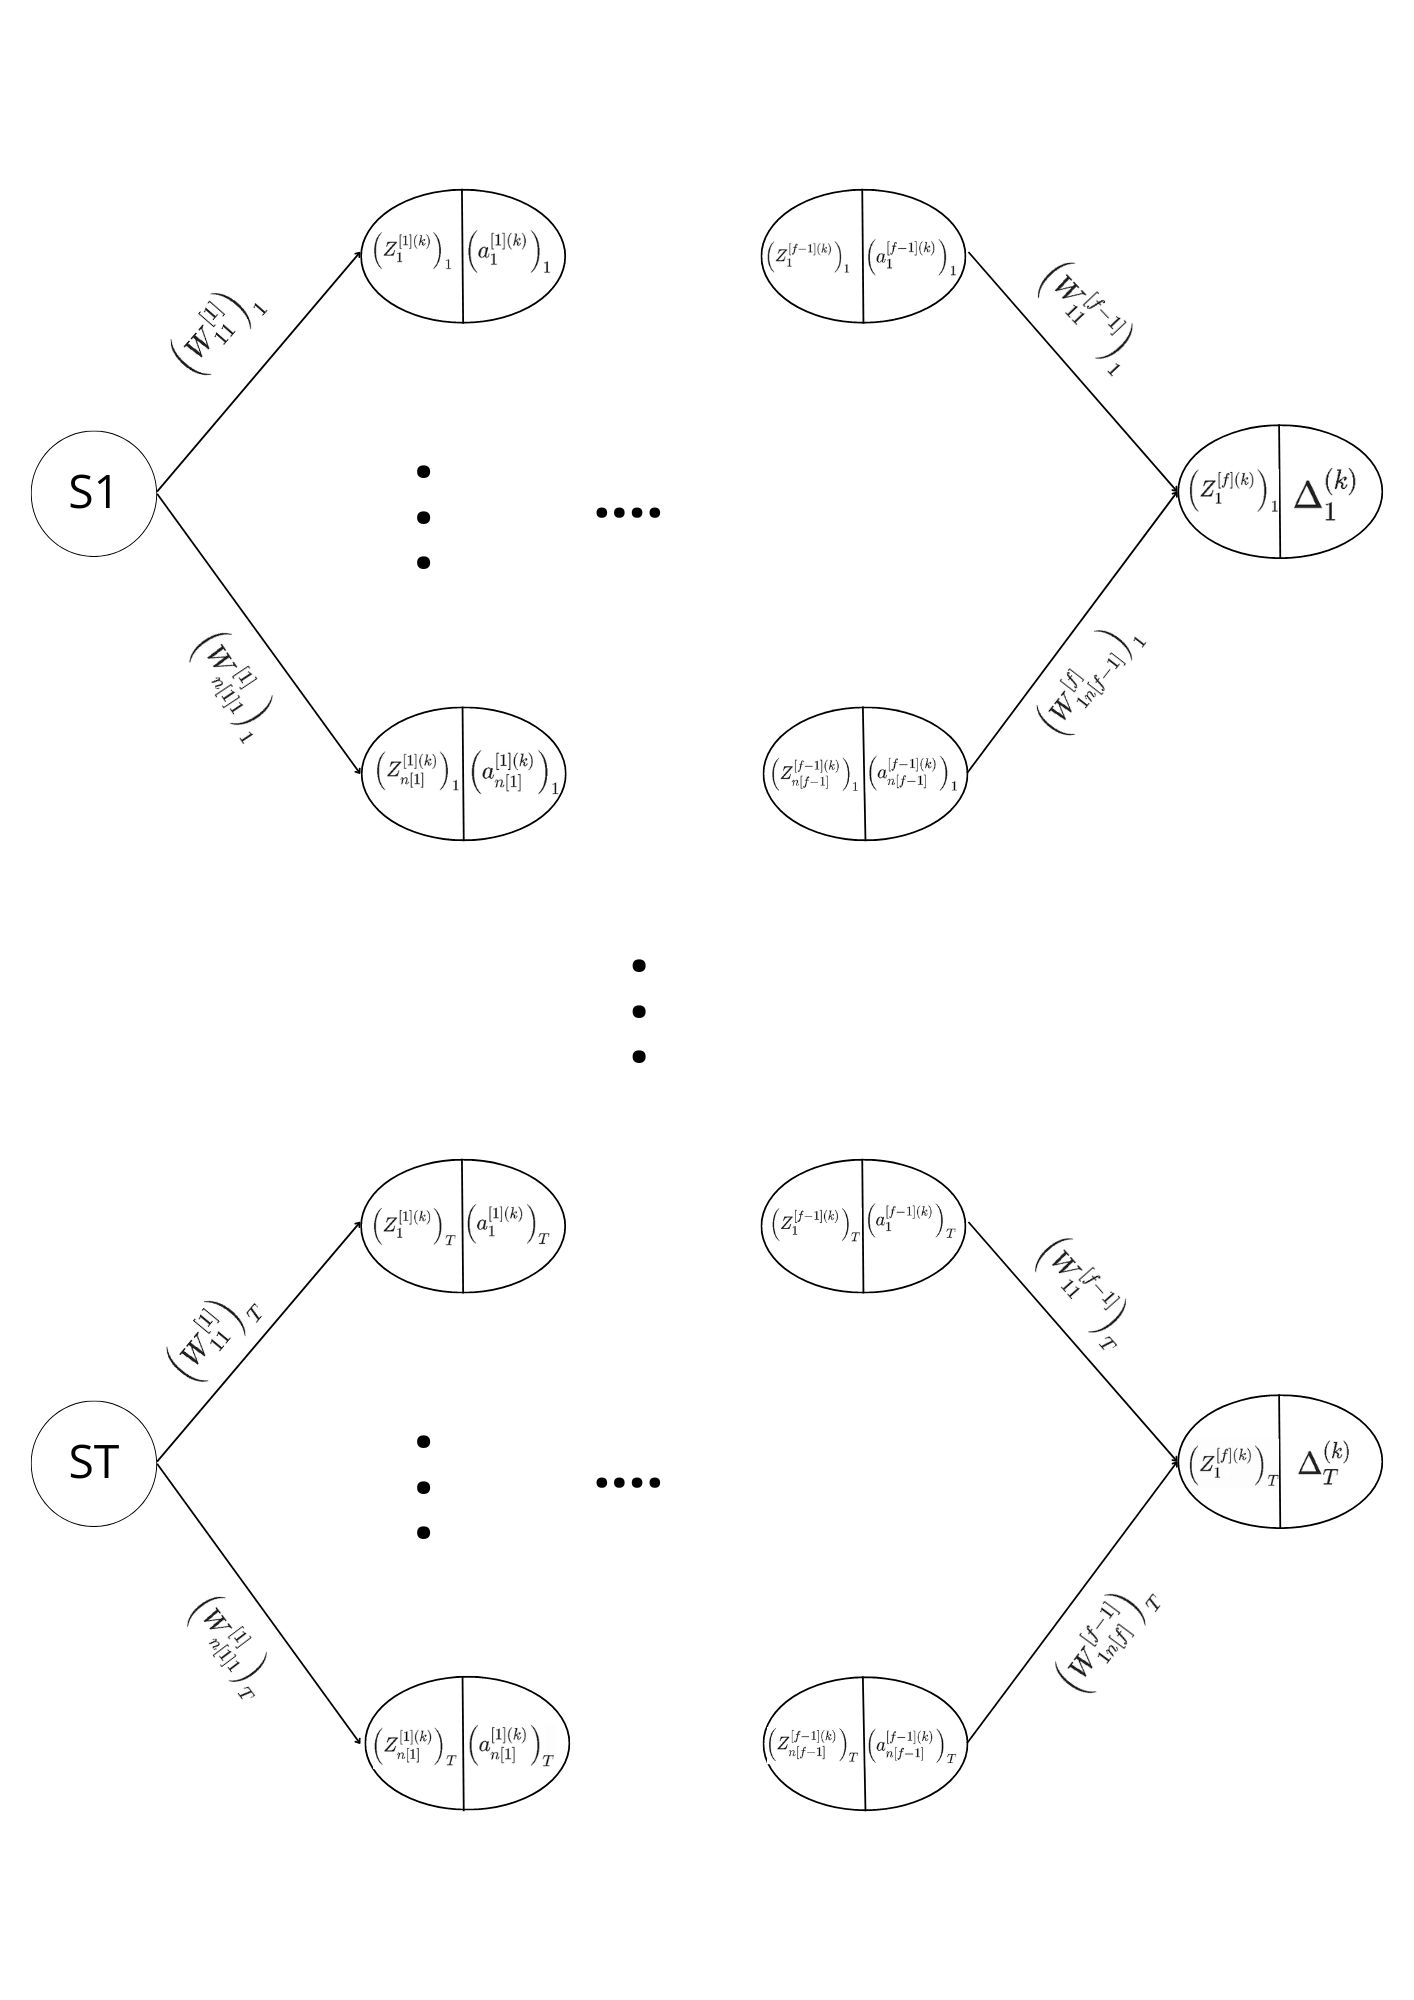

In [6]:
Image(filename='/architec.jpg')

In [ ]:
import numpy as np

def relu(x):
    """
    Fonction d'activation ReLU (Rectified Linear Unit)

    Args:
        x (numpy.ndarray): Entrée de la fonction ReLU

    Returns:
        numpy.ndarray: Sortie de la fonction ReLU
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Dérivée de la fonction d'activation ReLU

    Args:
        x (numpy.ndarray): Entrée de la dérivée ReLU

    Returns:
        numpy.ndarray: Sortie de la dérivée ReLU
    """
    x_copy = x.copy()
    x_copy[x_copy <= 0] = 0
    x_copy[x_copy > 0] = 1
    return x_copy

In [ ]:
def initialisation(dimensions):

    parametres = {}
    C = len(dimensions)


    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

##Forward propagation
$\left(Z_i^{[1](k)}\right)_t = \left(W_{i1}^{[1]}\right)_t$ $S_t^{(k)} + \left(b_1\right)_t$

$\left(a_i^{[c](k)}\right)_t = Relu(  \left(Z_i^{[c](k)}\right)_t)$

$\left(Z_i^{[c](k)}\right)_t = \sum_{j=1}^{n^{[c-1]}} \left(W_{ij}^{[c]}\right)_t.\left(a_i^{[c-1](k)}\right)_t+ \left(b_i^{[c]}\right)_t $

$\left(a_i^{[f](k)}\right)_t = \frac{1}{1+e^{-\left(Z_1^{[f](k)}\right)_t}}$

avec:

[c] : indice de couche

[f] : couche finale

i : indice du neuron de la couche courante

n[c]: nombre de neuron dans la couche C

(k) : indice des données

t : le step time

**Forme matriciel:**

$Z^{[1]} = W^{[1]} . X + B^{[1]}$

$A^{[c]}= Relu( Z^{[c]})$

$Z^{[c]} = W^{[c]} . A^{[c-1]} + B^{[c]}$

$A^{[f]} = \frac{1}{1+e^{-Z^{[c]}}}$


$\left(Z^{[c]}\right)_t =
\begin{bmatrix}
\left(Z_1^{[c](1)}\right)_t & \cdots & \left(Z_1^{[c](m)}\right)_t \\
\vdots & \ddots & \vdots \\
\left(Z_{n^{[c]}}^{[c](1)}\right)_t & \cdots & \left(Z_{n^{[c]}}^{[c](m)}\right)_t
\end{bmatrix}
\in \mathbb{R}^{n^{[c]} \times m}$

$\left(W^{[c]}\right)_t =
\begin{bmatrix}
\left(W_{11}^{[c]}\right)_t & \cdots & \left(W_{1n^[c-1]}^{[c]}\right)_t \\
\vdots & \ddots & \vdots \\
\left(W_{n^[c]1}^{[c]}\right)_t & \cdots & \left(W_{n^[c]n^[c-1]}^{[c]}\right)_t
\end{bmatrix} \in \mathbb{R}^{n^{[c]} \times n^[c-1]}
$

$\left(A^{[c]}\right)_t =
\begin{bmatrix}
\left(a_1^{[c](1)}\right)_t & \cdots & \left(a_1^{[c](m)}\right)_t \\
\vdots & \ddots & \vdots \\
\left(a_{n^{[c]}}^{[c](1)}\right)_t & \cdots & \left(a_{n^{[c]}}^{[c](m)}\right)_t
\end{bmatrix}
\in \mathbb{R}^{n^{[c]} \times m}
$

$\left(B^{[c]}\right)_t =
\begin{bmatrix}
\left(b_1^{[c]}\right)_t & \cdots & \left(b_1^{[c]}\right)_t \\
\vdots & \ddots & \vdots \\
\left(b_{n^{[c]}}^{[c]}\right)_t & \cdots & \left(b_{n^{[c]}}^{[c]}\right)_t
\end{bmatrix}
\in \mathbb{R}^{n^{[c]} \times m}
$



In [ ]:
def forward_propagation(X, parametres):
  # print(X.shape)

  activations = {'A0': X.reshape((X.shape[0],1)).T}

  C = len(parametres) // 2
  for c in range(1, C ):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    activations['A' + str(c)] = relu(Z)
  Z = parametres['W' + str(C)].dot(activations['A' + str(C - 1)]) + parametres['b' + str(C)]
  activations['A' + str(C)] =  1 / (1 + np.exp(-Z))

  return activations

##Back propagation

$L=\frac{1}{m} \sum_{l=1}^{m}(\sum_{k=0}^{n-1}\Delta^{(l)}_{t_k}(S^{(l)}_{t_{k+1}}-S^{(l)}_{t_k})+P^{(l)}-(S^{(l)}_{T}-K)_{t})^2$

Avec : $C^{(l)}=P^{(l)}-(S^{(l)}_{T}-K)_{t}$

Et $L_k=\sum_{k=0}^{m-1}\Delta^{(k)}_{t_k}(S^{(k)}_{t_{k+1}}-S^{(k)}_{t_k})+P^{(k)}-(S^{(k)}_{t}-K)_{t}$

Dérivé : \\
$\frac{\partial L}{\partial (W_{ij}^{[f]})_{t}}=\frac{1}{m}\sum_{k=1}^{m}\frac{\partial L_{k}}{\partial (W_{ij}^{[f]})_{t}} $

$\frac{\partial L_{k}}{\partial (w_{ij}^{[f]})_{t}}= \frac{\partial L_{k}}{\partial \Delta _{t}^{(k)}}\frac{\partial \Delta _{t}^{(j)}}{\partial (Z_ {1} ^{[f](i)})_{t}}\frac{\partial (Z_{1}^{[f](i)})_{t}}{\partial (W_{ij}^{[f]})_{t}}$

Avec :  $(dZ_{1}^{[f](k)} ) _{t}=\frac{\partial L_{k}}{\partial \Delta _{t}^{(k)}}\frac{\partial \Delta _{t}^{(j)}}{\partial (Z_{1} ^{[f](i)})_{t}}$

$\frac{\partial L_{k}}{\partial (W_{jf}^{[f-1]})_{t}}=\sum_{i=1}^{n[f]}(dZ _{i}^{[f](l)})_{t}\frac{\partial (Z _{i}^{[f](l)})}{\partial (a_{j}^{[f-1](l)})}\frac{\partial (a_{j}^{[f-1](i)})_{t}}{\partial (Z _{j}^{[f-1](l)})_{t}}\frac{\partial (Z _{j}^{[f-1](l)})_{t}}{\partial (W_{jl}^{[f-1]})t}$

Avec : $(dZ_{1}^{[f-1](k)} ) _{t}=\sum_{i=1}^{m[f]}(dZ_{i}^{[f](l)})_{t}\frac{\partial (Z _{i}^{[f](l)})}{\partial (a_{j}^{[f-1](l)})}\frac{\partial (a_{j}^{[f-1](i)})_{t}}{\partial (Z _{j}^{[f-1](l)})_{t}}$

Règle générale :

$(dZ _{1}^{[j](l)})_{t}= \frac{\partial L_{i}}{\partial \Delta _{t}^{(l)}}\frac{\partial \Delta _{t}^{(l)}}{\partial Z _{1}^{[j](l)}}$ (1)


$(dZ_{j}^{[c](l)})_{t}=\sum_{i=1}^{n[c+1]}(dZ _{j}^{[a+1](l)})_{t}\frac{\partial(Z _{i}^{[a](l)})_{t} }{\partial (a_{j}^{[c](l)})_{t}}\frac{\partial(a_{j}^{[c](l)})_{t}}{\partial (Z _{j}^{[c](l)})_{t}}$ (2)

$\frac{\partial L_{k}}{\partial (W_{jl}^{[c]})_{t}}=(dZ _{j}^{[c](k)})_{t}\frac{\partial(Z _{j}^{[c](k)})_{t}}{\partial (W_{jl}^{[c]})_{t}}
$ (3)



Commencons par (1) :

$\frac{\partial L_{k}}{\partial \Delta _{t}^{(j)}}= L (\sum_{t=1}^{n-1}\Delta _{t}^{(k)}(S_{t-1}^{(c)})-S_{t}^{(c)})+c^{(k)})(S_{t+1}^{(c)}-S_{t}^{(k)})$

$\frac{\partial (a_{i}^{[c](k)})_{t}}{\partial \tau _{i}^{[c](l)}}=(a_{i}^{[c](l)})_{t}(1-(a_{i}^{[c](l)})_{t+1})$

 $(dZ _{1}^{[c](k)})_{t} =2 ( \sum_{t=1}^{m-1}\Delta _{t}^{(k)}(S_{t+1}^{(k)}-S_{t}^{(k)})+c^{(k)})(S_{t+1}^{(k)}-S_{t}^{(k)})\Delta _{t}^{(k)}(1-\Delta _{t}^{(k)})$

(2)
-->

$\frac{\partial(Z _{i}^{[c](l)})_{t} }{\partial (a_{j}^{[c](l)})_{t}}=(W_{ij}^{[c]})_{t}$

--> $(dZ_{j}^{[c](l)})_{t}=\sum_{i=1}^{n[c+1]}(dZ _{j}^{[c+1](l)})_{t}(W_{ij}^{[c+1]})_{t}ReluDeri(  \left(Z_j^{[c](k)}\right)_t)$

(3)
-->
$\frac{\partial(Z _{j}^{[c](k)})_{t}}{\partial (W_{jl}^{[c]})_{t}}=(a_{j}^{[c-1](k)})_{t}
$

-->
$\frac{\partial L_{k}}{\partial (W_{jk}^{[c]})_{t}}=(dZ _{j}^{[c](k)})_{t}(a_{j}^{[c-1](k)})_{t}
$
$\frac{\partial L}{\partial (W_{jl}^{[f]})_{t}}=\frac{1}{m}\sum_{k=1}^{m}(dZ _{j}^{[c](k)})_{t}(a_{j}^{[c-1](k)})_{t} $


**Forme matriciel:**

$dZ^{[f]} = 2\left( \sum_{t=0}^{n-1} \Delta_t\left(S_{t+1}-S_{t}\right)+ C_t\right)\left(S_{t+1}-S_{t}\right)\Delta_t\left(1-\Delta_t\right)$

$dZ^{[c]} = \left[\left(W^{[1]}\right)_t^T.\left(dZ^{[c+1]}\right)_t\right] \left(A^{[c]}\right)_t \left(1-\left(A^{[c]}\right)_t\right)$

$dW^{[c]} = \frac{1}{m} \left(dZ^{[c]}\right).\left(A^{[c-1]}\right)_t^T$

$dB^{[c]} = \frac{1}{m} dZ^{[c]}.\mathbf{1}_{m}$

$\left(dZ^{[f]}\right)_t =
\begin{bmatrix}
\left(dZ_1^{[f](1)}\right)_t \\
\vdots \\
\left(dZ_1^{[f](m)}\right)_t
\end{bmatrix}$

$\left(dZ^{[c]}\right)_t =
\begin{bmatrix}
\left(dZ_1^{[c](1)}\right)_t & \cdots & \left(dZ_1^{[c](m)}\right)_t \\
\vdots & \ddots & \vdots \\
\left(dZ_{n^{[c]}}^{[c](1)}\right)_t & \cdots & \left(dZ_{n^{[c]}}^{[c](m)}\right)_t
\end{bmatrix}$

$S_t =
\begin{bmatrix}
S_t^{(1)} \\
\vdots \\
S_t^{(m)}
\end{bmatrix}$

$\mathbf{1}_{m} =
\begin{bmatrix}
1 \\
\vdots \\
1
\end{bmatrix}$

$\Delta_t =
\begin{bmatrix}
\Delta_t^{(1)} \\
\vdots \\
\Delta_t^{(m)}
\end{bmatrix}$

$c_t =
\begin{bmatrix}
c_t^{(1)} \\
\vdots \\
c_t^{(m)}
\end{bmatrix}$






In [ ]:
def back_propagation(C_M, parametres_M, activations_M):
  gradients_M=[]
  somme=activations_M[0]['A' + str(len(parametres_M[0]) // 2)]*(activations_M[1]['A' + str(0)]-activations_M[0]['A' + str(0)])
  for tk in range(1,len(parametres_M)-1):
    somme+=activations_M[tk]['A' + str(len(parametres_M[tk]) // 2)]*(activations_M[tk+1]['A' + str(0)]-activations_M[tk]['A' + str(0)])
  for t in range(len(parametres_M)-1):
    m = len(C_M)
    parametres=parametres_M[t]
    C = len(parametres) // 2
    activations=activations_M[t]
    dZ = 2*(somme+C_M)*activations['A' + str(C)]*(1-activations['A' + str(C)])*(activations_M[t+1]['A' + str(0)]-activations['A' + str(0)])
    gradients = {}
    for c in reversed(range(1, C + 1)):
      gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
      gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
      if c > 1:
        dZ = np.dot(parametres['W' + str(c)].T, dZ) *relu_derivative(activations['A' + str(c - 1)])
    gradients_M.append(gradients)

  return gradients_M

## Gradient Descent


La formule mathématique générale du gradient descent est :

$$\theta_{t+1} = \theta_t - \alpha \nabla_\theta J(\theta_t)$$

Où :
- $\theta_t$ représente les paramètres du modèle à l'itération $t$
- $\alpha$ est le taux d'apprentissage (learning rate)
- $\nabla_\theta J(\theta_t)$ est le gradient de la fonction de coût $J$ par rapport aux paramètres $\theta$ évalué à $\theta_t$

-->

$$\left(W^{[c]}\right)_t = \left(W^{[c]}\right)_t - \alpha dW^{[c]}$$
$$\left(B^{[c]}\right)_t = \left(B^{[c]}\right)_t - \alpha dB^{[c]}$$




In [ ]:
def update(gradients_M, parametres_M, learning_rate):
  for tk in range(len(parametres_M)-1):

    C = len(parametres_M[tk]) // 2

    for c in range(1, C ):

        parametres_M[tk]['W' + str(c)] = parametres_M[tk]['W' + str(c)] - learning_rate * gradients_M[tk]['dW' + str(c)]
        parametres_M[tk]['b' + str(c)] = parametres_M[tk]['b' + str(c)] - learning_rate * gradients_M[tk]['db' + str(c)]

    return parametres_M

In [ ]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af

In [ ]:
def deep_neural_network(X_M, C_M, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    parametres_M=[]
    for tk in range(len(X_M)-1):
      # initialisation parametres
      dimensions = list(hidden_layers)
      dimensions.insert(0, 1)
      dimensions.append(1)
      np.random.seed(10)
      parametres = initialisation(dimensions)
      parametres_M.append(parametres)
    # gradient descent
    for i in tqdm(range(n_iter)):
      activations_M=[]
      for t in range(len(X_M)-1):
        activations = forward_propagation(X_M[t].reshape((X_M[t].shape[0],1)), parametres_M[t])
        activations_M.append(activations)
      gradients_M = back_propagation(C_M, parametres_M, activations_M)
      parametres_M = update(gradients_M, parametres_M, learning_rate)



    return parametres_M

In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import norm

import pandas as pd

##Génération des données d'entrainement

In [ ]:
def BS_model_path(S0,r,sigma,T,nSteps,nPaths):

    # S0 spot price
    # r instantenous interest rate
    # sigma volatility
    # T maturity
    # nSteps number of time steps
    # nPaths : number of possible scenarios
    dt=T/(nSteps) # time step
    Log_returns=(r-sigma**2/2)*dt+ sigma*np.sqrt(dt)*npr.normal(0,1,(nPaths,nSteps)) # brownian increments

    Log_returns=np.concatenate((np.ones((nPaths,1))*np.log(S0),Log_returns),axis=1)

    Log_path=np.cumsum(Log_returns, axis=1)# concatenate with S0
    S= np.exp(Log_path)
    t=np.matrix(np.linspace(0,T,nSteps+1))

    return t,S

In [ ]:
def Call_price_BS(S0,t,K,r,sigma):

    d1= (np.log(S0/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2=(np.log(S0/K)+(r-sigma**2/2)*t)/(sigma*np.sqrt(t))

    price= S0*norm.cdf(d1)- np.exp(-r*t)*K*norm.cdf(d2)


    return price

Text(0, 0.5, 'S_t')

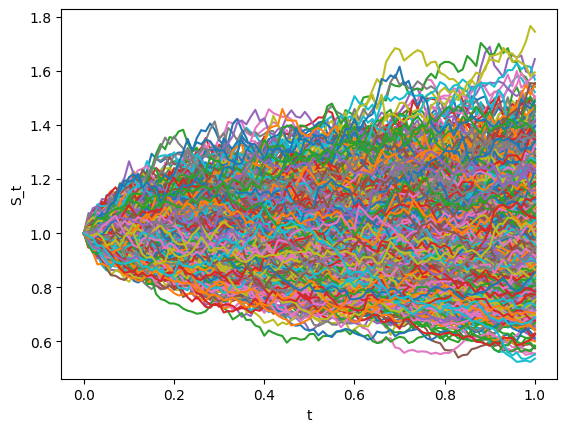

In [ ]:
S0=1
BS_PATH=BS_model_path(1,0.0,0.2,1,100, 1000);

plt.plot(BS_PATH[0].T,BS_PATH[1].T)
plt.xlabel('t')
plt.ylabel('S_t')

In [ ]:
S_M=BS_PATH[1]

In [ ]:
X_M= S_M.T
S=S_M[:,-1]
chargeToCustomer=Call_price_BS(1,1,1,0.0,0.20)
K=1
C_M=chargeToCustomer- np.maximum(S-K,0)
X_M.shape

(101, 1000)

##Aprentissage du modèle

In [ ]:
ddd=deep_neural_network(X_M, C_M, hidden_layers = (16, 16, 16,8), learning_rate = 1, n_iter = 1000)

100%|██████████| 1000/1000 [03:01<00:00,  5.52it/s]


##Génération des données de test

Text(0, 0.5, 'S_t')

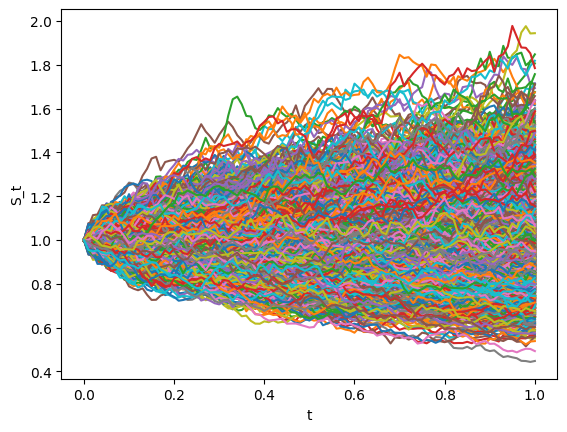

In [ ]:
S0=1
BS_PATH=BS_model_path(1,0.0,0.2,1,100, 3000);

plt.plot(BS_PATH[0].T,BS_PATH[1].T)
plt.xlabel('t')
plt.ylabel('S_t')

In [ ]:
S_M=BS_PATH[1]

In [ ]:
X_M= S_M.T
S=S_M[:,-1]
chargeToCustomer=Call_price_BS(1,1,1,0.0,0.20)
K=1
C_M=chargeToCustomer- np.maximum(S-K,0)
X_M.shape

(101, 3000)

 ## Disrtibution du bank balance

In [ ]:

activations_M=[]
for t in range(len(X_M)-1):
  activations = forward_propagation(X_M[t].reshape((X_M[t].shape[0],1)), ddd[t])
  activations_M.append(activations)
somme=activations_M[0]['A' + str(len(ddd[0]) // 2)]*(activations_M[1]['A' + str(0)]-activations_M[0]['A' + str(0)])
for tk in range(1,len(ddd)-1):

  somme+=activations_M[tk]['A' + str(len(ddd[tk]) // 2)]*(activations_M[tk+1]['A' + str(0)]-activations_M[tk]['A' + str(0)])



L = ((somme)+C_M)

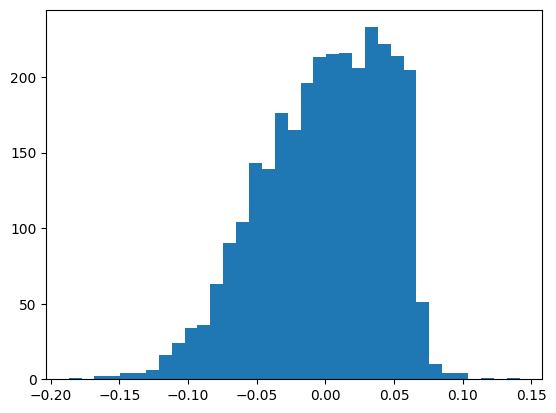

In [ ]:
plt.hist(L.T,bins='auto');

##Delta prediction

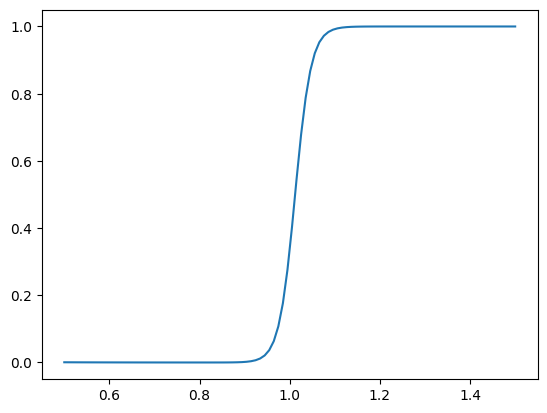

In [ ]:
plt.plot(np.linspace(0.5,1.5,100).reshape((100,1)),predict(np.linspace(0.5,1.5,100), ddd[95]).T)

##Deta predcition utilisant BS modèle

---



In [ ]:
def Delta_call_BS(S0,t,K,r,sigma):

    d1=(np.log(S0/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))

    delta=norm.cdf(d1)

    return delta




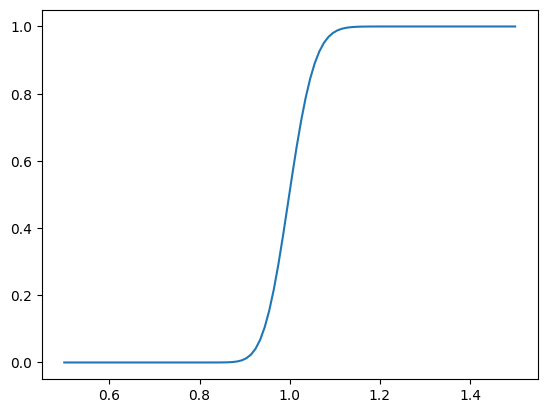

In [ ]:
S=np.linspace(0.5,1.5,100)
d=Delta_call_BS(S,0.05,1,0.0,0.20)

plt.plot(S,d)